# **📊 Dunyo iqtisodiy ko‘rsatkichlari (YaIM, inflyatsiya, ishsizlik)**

## **1-qadam. Kutubxonalarni chaqirish**

Kerakli kutubxonalarni chaqiramiz:  
- `wbdata` – Jahon banki API orqali iqtisodiy ma’lumotlarni olish  
- `pandas` – ma’lumotlarni jadval shaklida qayta ishlash  
- `matplotlib` – grafiklar chizish


In [25]:
!pip install wbdata --quiet

import wbdata
import pandas as pd
import matplotlib.pyplot as plt


## **2-qadam. Indikatorlarni tanlash**

Quyidagi uchta asosiy iqtisodiy ko‘rsatkichni tanlaymiz:  
- `NY.GDP.MKTP.CD` – YaIM (jami, USD)  
- `FP.CPI.TOTL.ZG` – Inflyatsiya (iste’mol narxlari indeksi, %)  
- `SL.UEM.TOTL.ZS` – Ishsizlik (umumiy, % ishchi kuchi)

In [26]:
# Indikatorlar
indicators = {
    "NY.GDP.MKTP.CD": "YaIM",          # Umumiy YaIM (USD)
    "FP.CPI.TOTL.ZG": "Inflyatsiya",   # Inflyatsiya (%)
    "SL.UEM.TOTL.ZS": "Ishsizlik",     # Ishsizlik (%)
}

## **3-qadam. Ma’lumotlarni yuklab olish**

Dunyo bo‘yicha (WLD – World) ma’lumotlarni yuklaymiz.

In [27]:
# Dunyo bo‘yicha ma’lumotlarni olish
df = wbdata.get_dataframe(indicators, country="WLD")

## **4-qadam. Vaqt indeksini sozlash**

Indeksni `datetime` formatiga o‘tkazamiz va sanalar bo‘yicha tartiblaymiz.

In [28]:
# Indeksni sozlash
df.index = pd.to_datetime(df.index)
df = df.sort_index()

## **5-qadam. Oraliqni tanlash**

Ma’lumotlarni 1990–2023 yillar oralig‘ida ko‘rib chiqamiz.


In [29]:
# 1990–2023 yillarni tanlash
df = df.loc["1990":"2023"]

## **6-qadam. Grafiklar chizish**

Uchta ko‘rsatkichni alohida-alohida grafiklarda chizamiz:  
- YaIM (trillion USD) – chiziqli grafik  
- Inflyatsiya (%) – chiziqli grafik  
- Ishsizlik (%) – chiziqli grafik

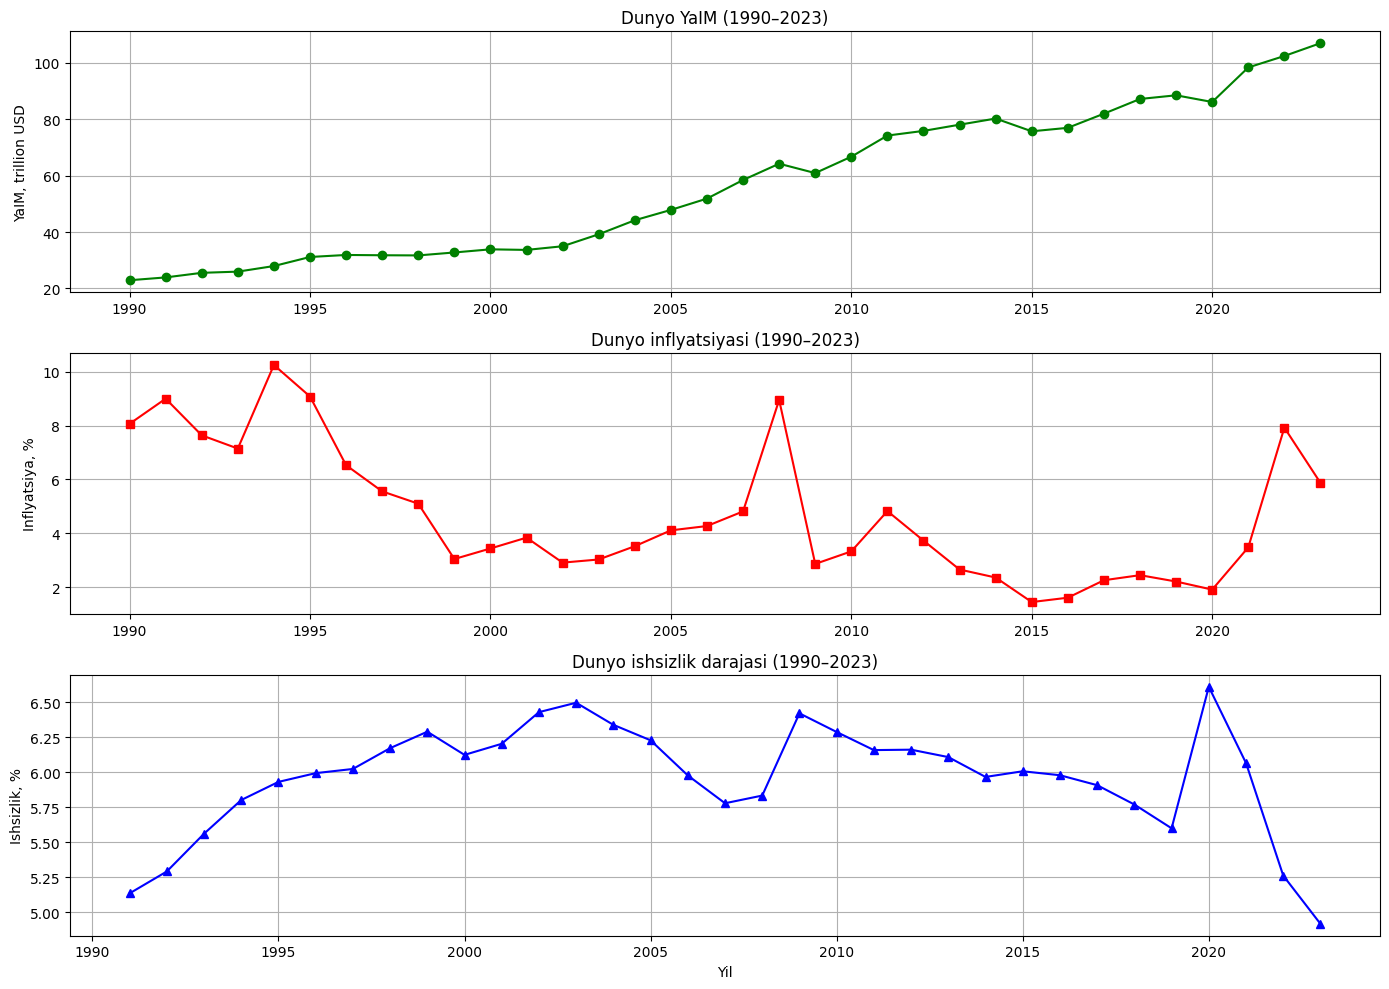

In [30]:
plt.figure(figsize=(14, 10))

# YaIM
plt.subplot(3, 1, 1)
plt.plot(df.index.year, df["YaIM"] / 1e12, marker="o", color="green")
plt.title("Dunyo YaIM (1990–2023)", fontsize=12)
plt.ylabel("YaIM, trillion USD")
plt.grid(True)

# Inflyatsiya
plt.subplot(3, 1, 2)
plt.plot(df.index.year, df["Inflyatsiya"], marker="s", color="red")
plt.title("Dunyo inflyatsiyasi (1990–2023)", fontsize=12)
plt.ylabel("Inflyatsiya, %")
plt.grid(True)

# Ishsizlik
plt.subplot(3, 1, 3)
plt.plot(df.index.year, df["Ishsizlik"], marker="^", color="blue")
plt.title("Dunyo ishsizlik darajasi (1990–2023)", fontsize=12)
plt.xlabel("Yil")
plt.ylabel("Ishsizlik, %")
plt.grid(True)

plt.tight_layout()
plt.show()